In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as plt_ex

In [3]:
datasetTweetsCSVPath = "../dataset/tweets.csv"

In [4]:
destCleanedDatasetPath = "../dataset/tweets_clean_datatype.h5"

In [5]:
df_tweets = pd.read_csv(datasetTweetsCSVPath, sep=',', index_col=0)

In [5]:
df_tweets.shape

(13664696, 9)

In [6]:
df_tweets.text = df_tweets.text.apply(lambda x:x.lower().strip() if type(x) == str else x)

In [7]:
df_tweets = df_tweets.drop_duplicates(keep='first')

In [8]:
df_tweets.shape

(11712091, 9)

In [8]:
df_tweets[df_tweets.text == ""]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
1197679862,19300510,0,0,0,0,0,0,2014-02-13 01:59:29,


In [9]:
df_tweets.loc[df_tweets.text == "", "text"] = np.nan

In [11]:
df_tweets.loc["1197679862"]

user_id                      19300510
retweet_count                       0
reply_count                         0
favorite_count                      0
num_hashtags                        0
num_urls                            0
num_mentions                        0
created_at        2014-02-13 01:59:29
text                              NaN
Name: 1197679862, dtype: object

In [12]:
df_tweets.text.isna().sum()

530032

## Index

In [13]:
df_tweets.index.value_counts()

dmy                   14
qsa                   12
jgm                   11
nis                   11
enl                   11
                      ..
472403921332613120     1
583261659797426176     1
361607898599657473     1
582869903788634113     1
486479812614451200     1
Name: id, Length: 11671629, dtype: int64

In [10]:
df_tweets.info()
print("Missing indexes BEFORE conversion:", df_tweets.index.isna().sum())
df_tweets.reset_index(drop=True, inplace=True, names=["id"])
print("Missing indexes AFTER conversion:", df_tweets.index.isna().sum())
print("Type after conversion:", df_tweets.index.dtype)
df_tweets

<class 'pandas.core.frame.DataFrame'>
Index: 11712091 entries, 509354017856950272 to 486479812614451200
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         object
 1   retweet_count   object
 2   reply_count     object
 3   favorite_count  object
 4   num_hashtags    object
 5   num_urls        object
 6   num_mentions    object
 7   created_at      object
 8   text            object
dtypes: object(9)
memory usage: 893.6+ MB
Missing indexes BEFORE conversion: 2
Missing indexes AFTER conversion: 0
Type after conversion: int64


,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
0,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"if man is a little lower than angels, then ang..."
1,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@bestwshhvids: how do you say these words wit..."
2,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@lolatcomedy awsome
3,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,stephen hawkins: i buchi neri non esistono se ...
4,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,rt @tibbs_montris: so ready for wednesday!
...,...,...,...,...,...,...,...,...,...
11712086,220933018,0,0,0,0,0,0,2018-05-04 05:29:33,esta manana aun esta muy frio ! miren esto ! ...
11712087,587491046,0,0,0,0,0,1,2020-04-17 02:51:53,"@warriors congrats, maybe i'll be able to get ..."
11712088,91781300,0,NaN,l25suv5,NaN,0.0,NaN,2016-07-10 22:43:09,NaN
11712089,127895572,0,0,1,1,0,0,2019-03-07 19:56:55,shooting crew of porn movies. #theworstjobtohave


In [11]:
def IsInteger(num):
    try:
        val = float(num)
        return float.is_integer(val)
    except ValueError:
        return False

def countIntegers(df, attr):
    numbers = df[attr].apply(IsInteger).sum()
    print("Number of not NaN integers", numbers)
    
def object_to_numeric(df, attr):
    print("Type before conversion:", df[attr].dtype)
    old_missingval = df[attr].isna().sum()
    print("Missing values before conversion:", old_missingval)
    # coerces non-numeric junk to NaNs
    df[attr] = pd.to_numeric(df[attr], errors='coerce', downcast='integer')
    #df[attr].fillna(-1).astype(np.int64)
    new_missingval = df[attr].isna().sum()
    print("Missing values after conversion:", new_missingval)
    print("Type after conversion:", df[attr].dtype)
    print("Min:", df[attr].min(), "\tMax:", df[attr].max())

def hist(df, column):
    numberOfBins = int(np.log2(len(df[column][df[column].notna()])) + 1)
    print("Number of bins:", numberOfBins)
    df[column].plot(kind='hist', title=column, bins=numberOfBins)
    plt.ylabel("count")
    plt.show()

def apply_bounds(df, column, upper_bound, lower_bound=0, inplace=True):
    overUpperBound = df[df[column] > upper_bound]
    belowLowerBound = df[df[column] < lower_bound]
    print("There are", len(overUpperBound), "values of", column, "higher than", upper_bound)
    print("There are", len(belowLowerBound), "values of", column, "lower than", lower_bound)
    if not inplace:
        return
    df.loc[overUpperBound.index] = np.nan
    df.loc[belowLowerBound.index] = np.nan
    print("Missing values after applying bounds:", df[column].isna().sum())
    print("Min:", df[column].min(), "      Max:", df[column].max())

In [16]:
countIntegers(df_tweets, "user_id")

Number of not NaN integers 11278203


In [12]:
object_to_numeric(df_tweets, "user_id")

Type before conversion: object
Missing values before conversion: 217276
Missing values after conversion: 433888
Type after conversion: float64
Min: 0.0 	Max: 2.9999999999999998e+296


In [18]:
countIntegers(df_tweets, "retweet_count")

Number of not NaN integers 11086634


In [13]:
object_to_numeric(df_tweets, "retweet_count")

Type before conversion: object
Missing values before conversion: 437134
Missing values after conversion: 625456
Type after conversion: float64
Min: 0.0 	Max: inf


In [14]:
apply_bounds(df_tweets, "retweet_count", 4100000)

There are 47 values of retweet_count higher than 4000000
There are 0 values of retweet_count lower than 0
Missing values after applying bounds: 625503
Min: 0.0       Max: 3350111.0


In [25]:
df_tweets[df_tweets.retweet_count == np.inf]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text


In [26]:
countIntegers(df_tweets, "reply_count")

Number of not NaN integers 10902551


In [15]:
object_to_numeric(df_tweets, "reply_count")

Type before conversion: object
Missing values before conversion: 647914
Missing values after conversion: 809539
Type after conversion: float64
Min: 0.0 	Max: inf


In [52]:
apply_bounds(df_tweets, "reply_count", 200000)

There are 73 values of reply_count higher than 200000
There are 0 values of reply_count lower than 0
Missing values after applying bounds: 810712
Min: 0.0       Max: 200000.0


In [53]:
df_tweets[df_tweets.reply_count == np.inf]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text


In [30]:
#df_tweets.loc[df_tweets.reply_count == np.inf] = np.nan

In [31]:
#df_tweets[df_tweets.reply_count == np.inf]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text


In [32]:
countIntegers(df_tweets, "favorite_count")

Number of not NaN integers 10903963


In [16]:
object_to_numeric(df_tweets, "favorite_count")

Type before conversion: object
Missing values before conversion: 647574
Missing values after conversion: 808127
Type after conversion: float64
Min: -1.0 	Max: 7e+211


In [17]:
apply_bounds(df_tweets, "favorite_count", 4200000)

There are 49 values of favorite_count higher than 4100000
There are 1 values of favorite_count lower than 0
Missing values after applying bounds: 808177
Min: 0.0       Max: 922462.0


In [35]:
df_tweets[df_tweets.favorite_count == -1]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text


In [21]:
countIntegers(df_tweets, "num_hashtags")

Number of not NaN integers 10548408


In [18]:
object_to_numeric(df_tweets, "num_hashtags")

Type before conversion: object
Missing values before conversion: 1057565
Missing values after conversion: 1163713
Type after conversion: float64
Min: 0.0 	Max: 7e+153


Number of bins: 24


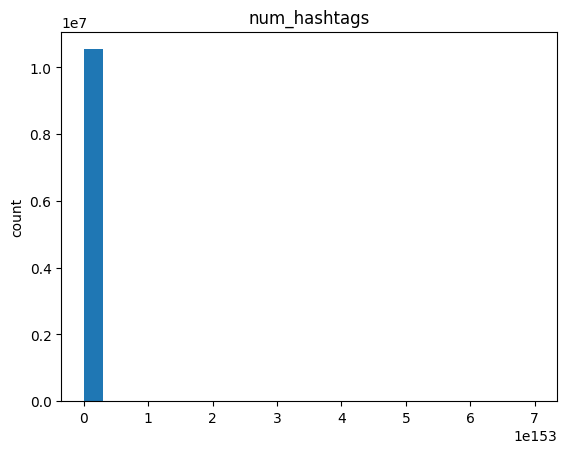

In [19]:
hist(df_tweets, "num_hashtags")

In [20]:
apply_bounds(df_tweets, "num_hashtags", 40)

There are 399 values of num_hashtags higher than 40
There are 0 values of num_hashtags lower than 0
Missing values after applying bounds: 1164112
Min: 0.0       Max: 38.0


In [46]:
countIntegers(df_tweets, "num_urls")

Number of not NaN integers 10903009


In [21]:
object_to_numeric(df_tweets, "num_urls")

Type before conversion: object
Missing values before conversion: 649058
Missing values after conversion: 809364
Type after conversion: float64
Min: 0.0 	Max: 1e+210


In [22]:
apply_bounds(df_tweets, "num_urls", 40)

There are 622 values of num_urls higher than 40
There are 0 values of num_urls lower than 0
Missing values after applying bounds: 809986
Min: 0.0       Max: 40.0


In [42]:
countIntegers(df_tweets, "num_mentions")

Number of not NaN integers 10723377


In [23]:
object_to_numeric(df_tweets, "num_mentions")

Type before conversion: object
Missing values before conversion: 855053
Missing values after conversion: 988812
Type after conversion: float64
Min: 0.0 	Max: 6.0000000000000004e+97


In [24]:
apply_bounds(df_tweets, "num_mentions", 40)

There are 513 values of num_mentions higher than 40
There are 0 values of num_mentions lower than 0
Missing values after applying bounds: 989325
Min: 0.0       Max: 40.0


In [25]:
df_tweets.created_at = pd.to_datetime(df_tweets.created_at, format='%Y-%m-%d %H:%M:%S')
print("Min:", df_tweets.created_at.min(), "\tMax:", df_tweets.created_at.max())

Min: 1953-04-17 12:24:33 	Max: 2040-04-27 11:03:25


In [26]:
invalid_created_at = df_tweets.loc[(df_tweets["created_at"] < '2012-01-01') | (df_tweets["created_at"] > '2020-12-31')]
invalid_created_at

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
223,1.482442e+07,0.0,0.0,0.0,1.0,0.0,1.0,1960-04-26 18:05:56,@arvixesupport shared ssl stopped working on a...
342,1.480228e+08,0.0,0.0,0.0,0.0,0.0,0.0,2038-06-22 08:28:55,faqat nabz se haal zaahir na hoga\nmera dil bh...
421,1.462660e+07,0.0,0.0,0.0,0.0,0.0,1.0,1958-03-15 16:54:57,@nancyjensen harry &amp; dwntwn 95% clear of s...
752,1.521942e+08,0.0,0.0,0.0,0.0,0.0,1.0,2040-02-29 13:20:29,@shuinkou ......./hopes senpie stay healthy......
959,1.852826e+09,0.0,0.0,0.0,1.0,0.0,0.0,1959-05-02 23:16:40,her tl is sooo dead omgg #herbff
...,...,...,...,...,...,...,...,...,...
11711637,1.494211e+08,1.0,0.0,0.0,0.0,0.0,2.0,2040-04-20 01:24:22,@yungtrello @rekofromthe5 yes you are
11711703,5.054330e+08,0.0,0.0,0.0,0.0,0.0,0.0,1960-03-17 01:36:18,i hate when people eat and they talk. then the...
11711855,1.858934e+09,1730.0,0.0,0.0,0.0,0.0,1.0,1960-03-18 12:53:14,rt @chiiiout: i want to do so much more in thi...
11711917,1.616349e+08,4.0,0.0,2.0,0.0,0.0,0.0,1960-05-16 15:11:04,11:11 for mary jane veloso's life to be comple...


In [27]:
df_tweets.loc[invalid_created_at.index, "created_at"] = np.nan

In [28]:
df_tweets.created_at.isna().sum()

99236

In [54]:
print("Min:", df_tweets.created_at.min(), "\tMax:", df_tweets.created_at.max())

Min: 2012-03-11 22:25:59 	Max: 2020-05-03 10:36:12


In [55]:
df_tweets.duplicated().sum()

15511

In [56]:
df_tweets = df_tweets.drop_duplicates(keep='first')

In [ ]:
df_tweets.text = df_tweets.text.astype('string')

In [57]:
df_tweets.dtypes

user_id                  float64
retweet_count            float64
reply_count              float64
favorite_count           float64
num_hashtags             float64
num_urls                 float64
num_mentions             float64
created_at        datetime64[ns]
text                      object
dtype: object

In [58]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11696580 entries, 0 to 11712090
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   user_id         float64       
 1   retweet_count   float64       
 2   reply_count     float64       
 3   favorite_count  float64       
 4   num_hashtags    float64       
 5   num_urls        float64       
 6   num_mentions    float64       
 7   created_at      datetime64[ns]
 8   text            object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 892.4+ MB


# Save on file

In [59]:
df_tweets.to_hdf(destCleanedDatasetPath, 'df_tweets', mode='w')

/tmp/ipykernel_20803/321830160.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['text'], dtype='object')]

  df_tweets.to_hdf(destCleanedDatasetPath, 'df_tweets', mode='w')
